# Tabular models

In [1]:
from fastai import *
from fastai.tabular import *
from tqdm import tqdm_notebook as tqdm

Tabular data should be in a Pandas `DataFrame`.

In [2]:
path = Path('../Data/Cat-in-the-dat/') #untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'train.csv')
test_df = pd.read_csv(path/'test.csv')
sample = pd.read_csv(path/'sample_submission.csv')

In [3]:
path

PosixPath('../Data/Cat-in-the-dat')

In [19]:
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [5]:
test_df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,600000,0.0,0.0,0.0,F,Y,Blue,Polygon,Axolotl,Finland,...,ca9ad1d4b,fced9e114,3.0,Novice,Boiling Hot,f,U,oU,3.0,9.0
1,600001,0.0,0.0,0.0,F,Y,Red,Circle,Lion,Russia,...,060a21580,7ca8775da,1.0,Novice,Cold,n,N,NaN,2.0,8.0
2,600002,0.0,0.0,0.0,F,Y,Blue,Circle,Axolotl,Russia,...,165e81a00,5940334c9,1.0,Expert,Warm,i,N,DN,2.0,6.0
3,600003,1.0,0.0,0.0,F,N,Red,Polygon,Axolotl,Costa Rica,...,77d41330d,6fbdeefc8,1.0,Expert,Hot,m,B,AG,1.0,6.0
4,600004,0.0,0.0,1.0,F,Y,Red,Circle,NaN,Finland,...,2218d9dfe,2a27c8fde,1.0,Contributor,Lava Hot,o,J,DT,3.0,3.0


## Do some EDA

In [6]:
df.id.nunique()

600000

In [7]:
df.bin_0.nunique(), df.bin_1.nunique(), df.bin_2.nunique(), df.bin_3.nunique(), df.bin_4.nunique()

(2, 2, 2, 2, 2)

In [8]:
df.nom_0.nunique(), df.nom_1.nunique(), df.nom_2.nunique(),
df.nom_3.nunique(), df.nom_4.nunique(), df.nom_5.nunique(),
df.nom_6.nunique(), df.nom_7.nunique(), df.nom_8.nunique(),
df.nom_9.nunique(), 

(3, 6, 6, 6, 4, 1220, 1519, 222, 222, 2218)

In [9]:
df.ord_0.nunique(), df.ord_1.nunique(), df.ord_2.nunique(),
df.ord_3.nunique(), df.ord_4.nunique(), df.ord_5.nunique() 

(3, 5, 6, 15, 26, 190)

In [10]:
df.day.nunique(), df.month.nunique()

(7, 12)

In [11]:
df.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
       'target'],
      dtype='object')

In [12]:
dep_var = 'target'
cat_names = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
             'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8',
             'nom_9','ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5',
             'day', 'month']
cont_names = ['id']
procs = [FillMissing, Categorify, Normalize]

In [13]:
df.bin_0.dtype

dtype('float64')

In [14]:
embed = {}
for col in cat_names:
    embed[col] = min(df[col].nunique(), 50)

In [15]:
embed

{'bin_0': 2,
 'bin_1': 2,
 'bin_2': 2,
 'bin_3': 2,
 'bin_4': 2,
 'nom_0': 3,
 'nom_1': 6,
 'nom_2': 6,
 'nom_3': 6,
 'nom_4': 4,
 'nom_5': 50,
 'nom_6': 50,
 'nom_7': 50,
 'nom_8': 50,
 'nom_9': 50,
 'ord_0': 3,
 'ord_1': 5,
 'ord_2': 6,
 'ord_3': 15,
 'ord_4': 26,
 'ord_5': 50,
 'day': 7,
 'month': 12}

In [16]:
len(embed)

23

In [17]:
test = TabularList.from_df(test_df, path=path, cat_names=cat_names, cont_names=cont_names)#, procs=procs)

In [20]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_rand_pct(0.1)
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch(bs=2048))

In [21]:
data.show_batch(rows=5)

bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,id,target
0.0,0.0,0.0,F,Y,Blue,Polygon,Lion,India,Theremin,edc3d5f4b,25a82825e,0c208bfa0,210039295,d9975757a,1.0,Expert,Hot,c,C,lA,#na#,7.0,1.5086,0
0.0,1.0,0.0,F,Y,Blue,Triangle,Hamster,India,Theremin,e6c5687be,da1442fef,362507ea5,6eb21874b,4d5015c66,1.0,Expert,Warm,n,F,us,6.0,12.0,0.0610,0
0.0,0.0,0.0,F,Y,Blue,Trapezoid,Dog,Russia,Theremin,e7eaa3efc,c1ae8de07,1ba4e8ff1,fa49d4e04,7ddc2a5bb,1.0,Expert,Warm,m,D,lA,5.0,12.0,-1.5547,1
0.0,0.0,1.0,F,N,Blue,Triangle,Hamster,India,Theremin,d78c9256b,8913f7b11,4ae48e857,590d9c11d,dcc6b8394,3.0,Master,Lava Hot,i,A,vq,3.0,12.0,0.0493,1
0.0,1.0,0.0,T,N,Green,Triangle,Dog,Russia,Bassoon,8251357d5,45c2d06eb,#na#,53efabb84,6175696eb,1.0,Grandmaster,Freezing,o,Q,DN,2.0,12.0,0.4288,0


In [22]:
# learn = tabular_learner(data, layers=[300,200,100], metrics=accuracy)

learn = tabular_learner(data, layers=[300,200,100],emb_szs=embed, emb_drop=0.3,ps=0.3, metrics=accuracy)

In [24]:
learn

Learner(data=TabularDataBunch;

Train: LabelList (540000 items)
x: TabularList
bin_0 0.0; bin_1 0.0; bin_2 0.0; bin_3 F; bin_4 N; nom_0 Red; nom_1 Trapezoid; nom_2 Hamster; nom_3 Russia; nom_4 Bassoon; nom_5 de4c57ee2; nom_6 a64bc7ddf; nom_7 598080a91; nom_8 0256c7a4b; nom_9 02e7c8990; ord_0 3.0; ord_1 Contributor; ord_2 Hot; ord_3 c; ord_4 U; ord_5 Pw; day 6.0; month 3.0; id -1.7315; ,bin_0 1.0; bin_1 1.0; bin_2 0.0; bin_3 F; bin_4 Y; nom_0 Red; nom_1 Star; nom_2 Axolotl; nom_3 #na#; nom_4 Theremin; nom_5 2bb3c3e5c; nom_6 3a3a936e8; nom_7 1dddb8473; nom_8 52ead350c; nom_9 f37df64af; ord_0 3.0; ord_1 Grandmaster; ord_2 Warm; ord_3 e; ord_4 X; ord_5 pE; day 7.0; month 7.0; id -1.7315; ,bin_0 0.0; bin_1 1.0; bin_2 0.0; bin_3 F; bin_4 N; nom_0 Red; nom_1 #na#; nom_2 Hamster; nom_3 Canada; nom_4 Bassoon; nom_5 b574c9841; nom_6 708248125; nom_7 5ddc9a726; nom_8 745b909d1; nom_9 #na#; ord_0 3.0; ord_1 #na#; ord_2 Freezing; ord_3 n; ord_4 P; ord_5 eN; day 5.0; month 9.0; id -1.7315; ,bin_0 #n

In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.91E-02
Min loss divided by 10: 5.25E-02


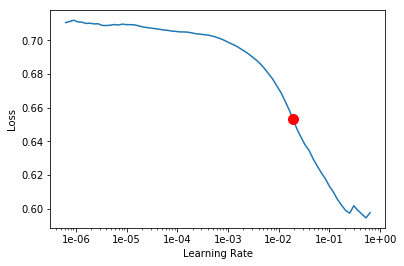

In [26]:
learn.recorder.plot(suggestion=True)

In [27]:
data.batch_size

2048

In [28]:
learn.fit(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.409393,0.400456,0.823400,00:44
1,0.404779,0.399251,0.823617,00:43
2,0.402631,0.400236,0.824033,00:45
3,0.400137,0.399345,0.824567,00:45
4,0.397504,0.402079,0.822717,00:44


In [29]:
learn.unfreeze()

In [30]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


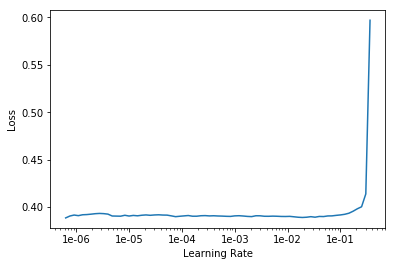

In [31]:
learn.recorder.plot()

In [32]:
learn.fit_one_cycle(5, 1e-05)

epoch,train_loss,valid_loss,accuracy,time
0,0.390099,0.401301,0.822783,00:45
1,0.388742,0.400984,0.822900,00:45
2,0.388752,0.400825,0.822833,00:43
3,0.388107,0.400702,0.822817,00:45
4,0.389143,0.400786,0.822867,00:48


In [65]:
learn.model.

<bound method Module.parameters of TabularModel(
  (embeds): ModuleList(
    (0): Embedding(3, 2)
    (1): Embedding(3, 2)
    (2): Embedding(3, 2)
    (3): Embedding(3, 2)
    (4): Embedding(3, 2)
    (5): Embedding(4, 3)
    (6): Embedding(7, 6)
    (7): Embedding(7, 6)
    (8): Embedding(7, 6)
    (9): Embedding(5, 4)
    (10): Embedding(1220, 50)
    (11): Embedding(1520, 50)
    (12): Embedding(223, 50)
    (13): Embedding(223, 50)
    (14): Embedding(2219, 50)
    (15): Embedding(4, 3)
    (16): Embedding(6, 5)
    (17): Embedding(7, 6)
    (18): Embedding(16, 15)
    (19): Embedding(27, 26)
    (20): Embedding(191, 50)
    (21): Embedding(8, 7)
    (22): Embedding(13, 12)
  )
  (emb_drop): Dropout(p=0.3)
  (bn_cont): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=410, out_features=300, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_

## Inference

In [33]:
sample.head()

,id,target
0,600000,0.5
1,600001,0.5
2,600002,0.5
3,600003,0.5
4,600004,0.5


In [34]:
row = df.iloc[0]

In [35]:
DatasetType.Test

<DatasetType.Test: 3>

In [36]:
pred = learn.get_preds(DatasetType.Test)

In [37]:
pred[0]

tensor([[0.8894, 0.1106],
        [0.8286, 0.1714],
        [0.8548, 0.1452],
        ...,
        [0.5095, 0.4905],
        [0.7852, 0.2148],
        [0.8156, 0.1844]])

In [38]:
def get_submision(preds):
    labelled_preds = []
    pred11 = preds
    for pred in tqdm(pred11):
        labelled_preds.append(int(np.argmax(pred)))
    
    sample['target'] = labelled_preds
    
    return sample

In [39]:
submission = get_submision(pred[0])

In [40]:
submission.reset_index(drop=True)

,id,target
0,600000,0
1,600001,0
2,600002,0
3,600003,0
4,600004,0
5,600005,0
6,600006,1
7,600007,0
8,600008,0
9,600009,0


In [41]:
submission.to_csv('./sub_low_embed_1.csv',index=False)